In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.style.use('seaborn')

## Load Darasets

In [2]:
df_data = pd.read_csv("./datasets/data.csv")
df_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Explore & Visualize Data

In [3]:
print('Total rows:', df_data.shape[0])
print('Total features:', df_data.shape[1])

Total rows: 569
Total features: 33


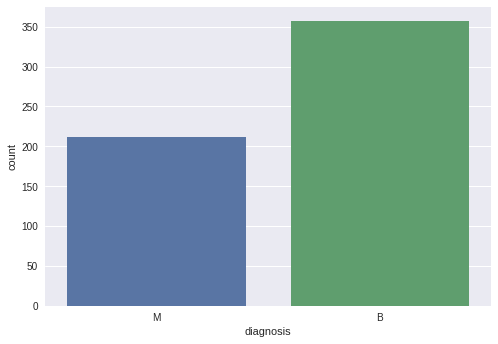

In [4]:
sns.countplot(x='diagnosis', data=df_data)
plt.show()

## Preprocess Data

#### Transform Categorical Data

In [20]:
df_data.keys()

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst',
       ...
       'texture_worst_40.54', 'texture_worst_40.68', 'texture_worst_41.61',
       'texture_worst_41.78', 'texture_worst_41.85', 'texture_worst_42.79',
       'texture_worst_44.87', 'texture_worst_45.41', 'texture_worst_47.16',
       'texture_worst_49.54'],
      dtype='object', length=8211)

In [6]:
df_data = df_data.drop(['id', 'texture_mean', 'smoothness_mean', 'compactness_mean', 
                        'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 
                        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
                        'fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst', 
                        'Unnamed: 32'],axis = 1)

In [7]:
# process categorical data
cat_vars = ['concave points_worst','perimeter_worst','area_worst','radius_worst','concave points_mean',
            'perimeter_mean','radius_mean','area_mean','concavity_mean','area_se','concavity_worst',
            'perimeter_se','compactness_worst','smoothness_worst','radius_se','texture_worst']
for var in cat_vars:
    cat_list = pd.get_dummies(df_data[var], prefix=var)
    data1 = df_data.join(cat_list)
    df_data = data1

In [8]:
mapping = {'B':0, 'M':1}
df_data['diagnosis'] = df_data['diagnosis'].map(mapping)
pd.to_numeric(df_data['diagnosis'])
df_data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,...,texture_worst_40.54,texture_worst_40.68,texture_worst_41.61,texture_worst_41.78,texture_worst_41.85,texture_worst_42.79,texture_worst_44.87,texture_worst_45.41,texture_worst_47.16,texture_worst_49.54
0,1,17.99,122.80,1001.0,0.3001,0.14710,1.0950,8.589,153.40,25.38,...,0,0,0,0,0,0,0,0,0,0
1,1,20.57,132.90,1326.0,0.0869,0.07017,0.5435,3.398,74.08,24.99,...,0,0,0,0,0,0,0,0,0,0
2,1,19.69,130.00,1203.0,0.1974,0.12790,0.7456,4.585,94.03,23.57,...,0,0,0,0,0,0,0,0,0,0
3,1,11.42,77.58,386.1,0.2414,0.10520,0.4956,3.445,27.23,14.91,...,0,0,0,0,0,0,0,0,0,0
4,1,20.29,135.10,1297.0,0.1980,0.10430,0.7572,5.438,94.44,22.54,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_data.columns.values

array(['diagnosis', 'radius_mean', 'perimeter_mean', ...,
       'texture_worst_45.41', 'texture_worst_47.16',
       'texture_worst_49.54'], dtype=object)

In [10]:
# remove categorical data
cat_vars = ['concave points_worst','perimeter_worst','area_worst','radius_worst','concave points_mean',
            'perimeter_mean','radius_mean','area_mean','concavity_mean','area_se','concavity_worst',
            'perimeter_se','compactness_worst','smoothness_worst','radius_se','texture_worst']
data_vars = df_data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [11]:
df_data2 = df_data[to_keep]
df_data2.columns.values

array(['diagnosis', 'concave points_worst_0.0',
       'concave points_worst_0.008772', ..., 'texture_worst_45.41',
       'texture_worst_47.16', 'texture_worst_49.54'], dtype=object)

In [12]:
df_data2['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
data_vars = df_data2.columns.values.tolist()
y = ['diagnosis']
X = [i for i in data_vars if i not in y]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_data2[X], df_data2[y], test_size=0.3, random_state=0)

## Model Data

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/indra/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [18]:
model_score = logreg.score(X_test, y_test)
print('Model Accuracy:', model_score)

Model Accuracy: 0.6374269005847953


##### Model Accuracy 1 : 0.631578947368421